# Utilisation des mots ne figurant pas dans le dictionnaire français

## Paquets utilisés
On aura besoin des librairie externe: 
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [wordcloud](https://amueller.github.io/word_cloud/)

In [19]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from typing import List

## Ouverture des fichiers contenant les données a utiliser

In [20]:
songs: pd.DataFrame
french: pd.Series
english: pd.Series

with open("./datas/songs.json", "r", encoding="utf8") as file:
        songs = pd.DataFrame(json.loads(file.read()))
        file.close()

with open("./datas/french.txt", "r", encoding="utf8") as file:
        french = pd.Series(file.read().lower().splitlines())
        file.close()

# Generated with http://app.aspell.net/create
with open("./datas/english.txt", "r", encoding="utf8") as file:
        english = pd.Series(file.read().lower().splitlines())
        file.close()

## Séléction et manipulation des données afin de pouvoir les utiliser

In [21]:
# Group all the words of all the songs in a single pd.Serie
words: pd.Series = songs["lyrics_keywords"].apply(lambda x: x.split(" ")).explode()

# Count all the words in this array
occurences: pd.Series = words.value_counts()

# Create a Dataframe that contains the number of occurence
# and if the word is inside the french dictionary
data = {
    "count": occurences,
    "is_french": occurences.index.isin(french),
    "is_english": occurences.index.isin(english)
}

description = pd.DataFrame(
    data=data,
    columns=["count", "is_french", "is_english"],
    index=occurences.index
)

# Select only the words that aren't french
not_french = description[description["is_french"] == False]
not_french = not_french[not_french["is_english"] == False]

frequency = pd.Series(not_french["count"], index=not_french.index)

with open("./datas/not_french.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

not_french

,count,is_french,is_english
binks,266,False,False
wesh,227,False,False
p'tit,205,False,False
poto,195,False,False
keufs,183,False,False
...,...,...,...
niak,1,False,False
makala,1,False,False
jouеr,1,False,False
tchéker,1,False,False


Ceci est la liste des mots de figurant pas dans le dictionnaire france avec leurs occurences (globale, parmis toutes les musiques)

## WordCloud, plus le mot est grand, plus il est utilisé

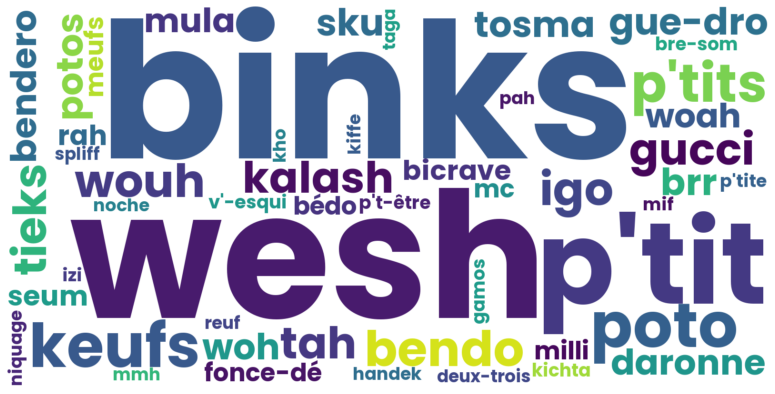

In [22]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

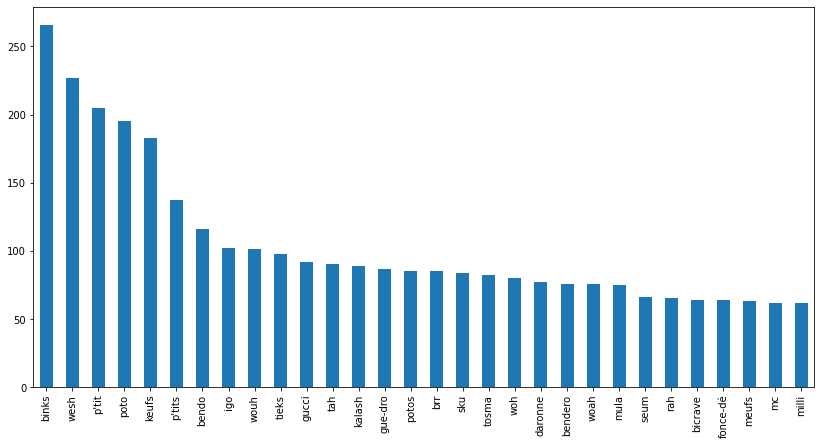

In [23]:
frequency[:30].plot(kind="bar", figsize=(14, 7))

# Les anglicismes

In [24]:
english_words = description[description["is_french"] == False]
english_words = english_words[english_words["is_english"] == True]

frequency = pd.Series(english_words["count"], index=english_words.index)

with open("./datas/english_words.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

frequency

yeah      1303
hey        911
fuck       419
yah        267
biff       260
          ... 
wonder       1
chaw         1
uzis         1
cate         1
hed          1
Name: count, Length: 1847, dtype: int64

## WordCloud, plus le mot est grand, plus il est utilisé

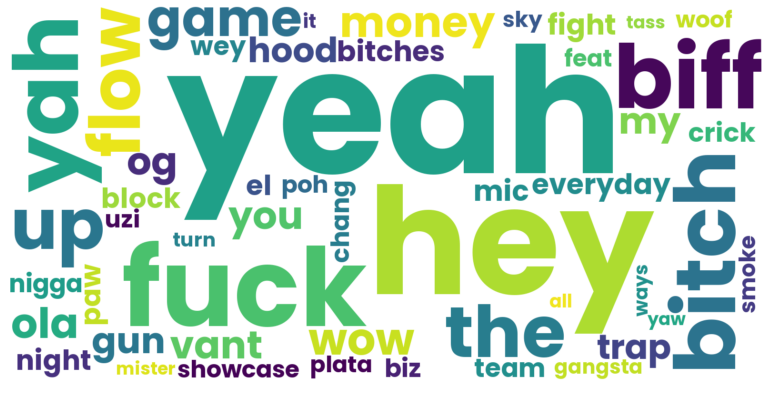

In [25]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

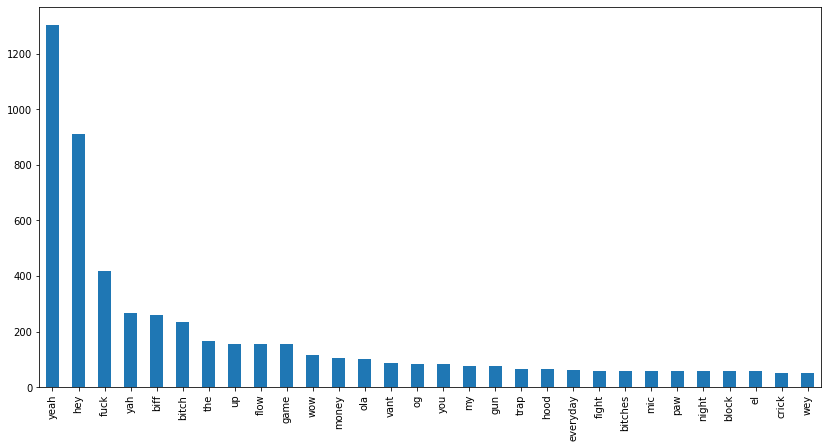

In [26]:
frequency[:30].plot(kind="bar", figsize=(14, 7))